# Polarized Beams

This notebook demonstrates the generation and visualization of various polarized beams available in Janssen. These beams are essential for high-NA focusing simulations where vector effects become significant.

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import janssen as jns

In [2]:
wavelength = 633e-9
dx = 100e-9
grid_size = (256, 256)
beam_radius = 10e-6

In [3]:
def plot_polarized_beam(wf, title):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    
    ex = wf.field[..., 0]
    ey = wf.field[..., 1]
    
    axes[0, 0].imshow(jnp.abs(ex), cmap="viridis")
    axes[0, 0].set_title("|Ex|")
    axes[0, 0].axis("off")
    
    axes[0, 1].imshow(jnp.abs(ey), cmap="viridis")
    axes[0, 1].set_title("|Ey|")
    axes[0, 1].axis("off")
    
    total_intensity = jnp.abs(ex)**2 + jnp.abs(ey)**2
    axes[0, 2].imshow(total_intensity, cmap="inferno")
    axes[0, 2].set_title("Total Intensity")
    axes[0, 2].axis("off")
    
    axes[1, 0].imshow(jnp.angle(ex), cmap="twilight", vmin=-jnp.pi, vmax=jnp.pi)
    axes[1, 0].set_title("Phase(Ex)")
    axes[1, 0].axis("off")
    
    axes[1, 1].imshow(jnp.angle(ey), cmap="twilight", vmin=-jnp.pi, vmax=jnp.pi)
    axes[1, 1].set_title("Phase(Ey)")
    axes[1, 1].axis("off")
    
    ny, nx = ex.shape
    step = 16
    y, x = jnp.mgrid[step//2:ny:step, step//2:nx:step]
    u = jnp.real(ex[y, x])
    v = jnp.real(ey[y, x])
    axes[1, 2].quiver(x, y, u, v, pivot="mid")
    axes[1, 2].set_xlim(0, nx)
    axes[1, 2].set_ylim(ny, 0)
    axes[1, 2].set_aspect("equal")
    axes[1, 2].set_title("Polarization (Re)")
    axes[1, 2].axis("off")
    
    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

## Radially Polarized Beam

The electric field points radially outward from the optical axis. When focused by a high-NA lens, this creates a strong longitudinal Ez component at the focus.

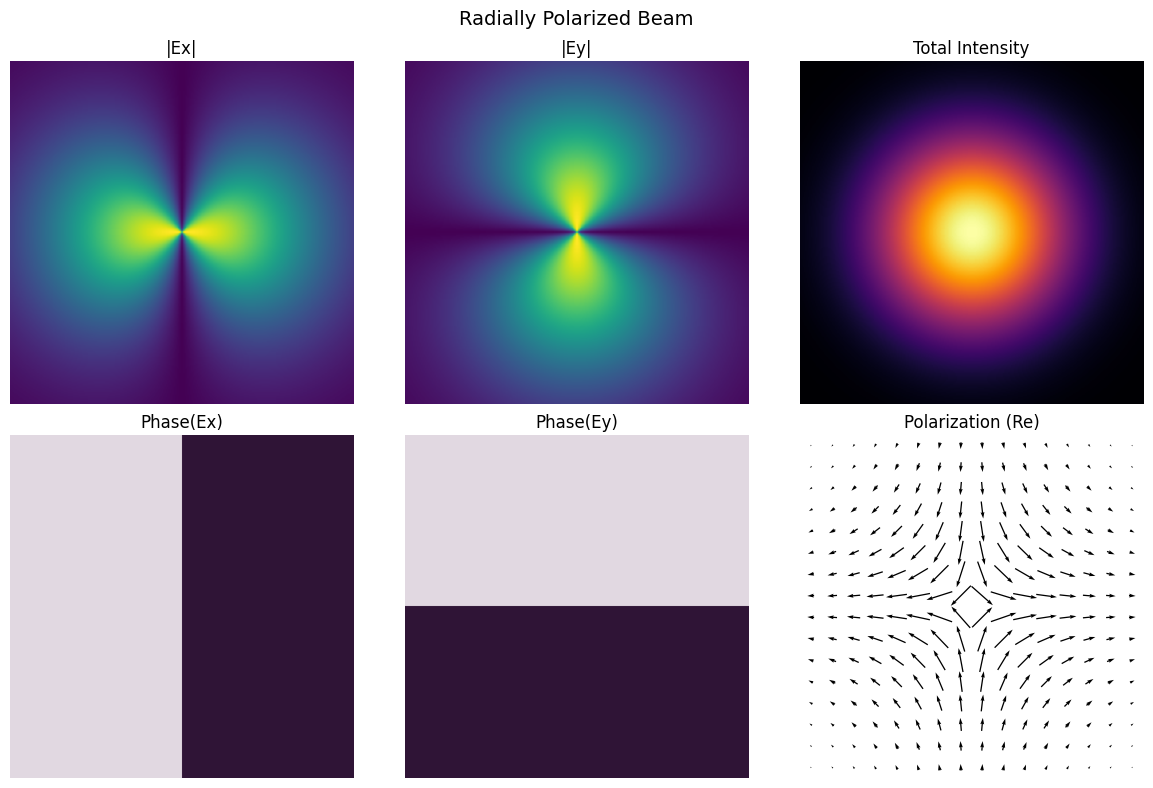

In [4]:
radial = jns.models.radially_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    beam_radius=beam_radius,
)
plot_polarized_beam(radial, "Radially Polarized Beam")

## Azimuthally Polarized Beam

The electric field circulates azimuthally around the optical axis. When focused, this produces a "donut" intensity profile with NO longitudinal Ez component.

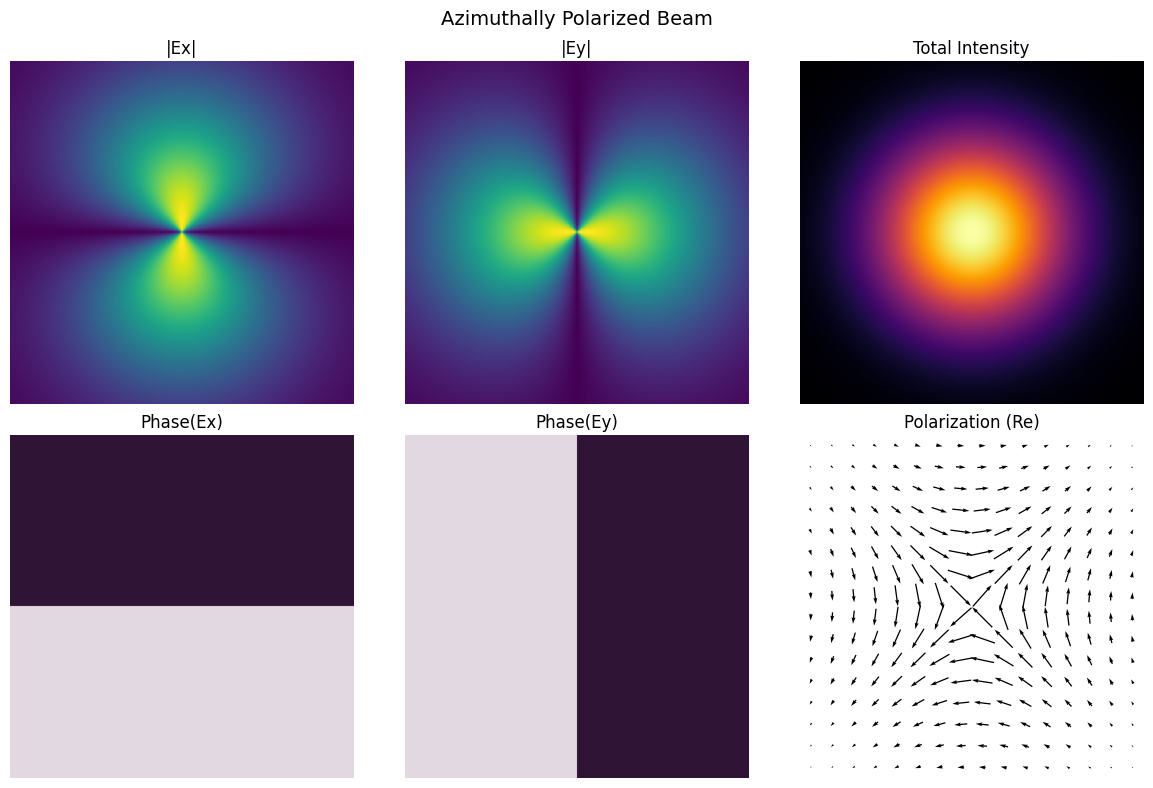

In [5]:
azimuthal = jns.models.azimuthally_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    beam_radius=beam_radius,
)
plot_polarized_beam(azimuthal, "Azimuthally Polarized Beam")

## X-Polarized Beam

Uniform linear polarization along the x-axis.

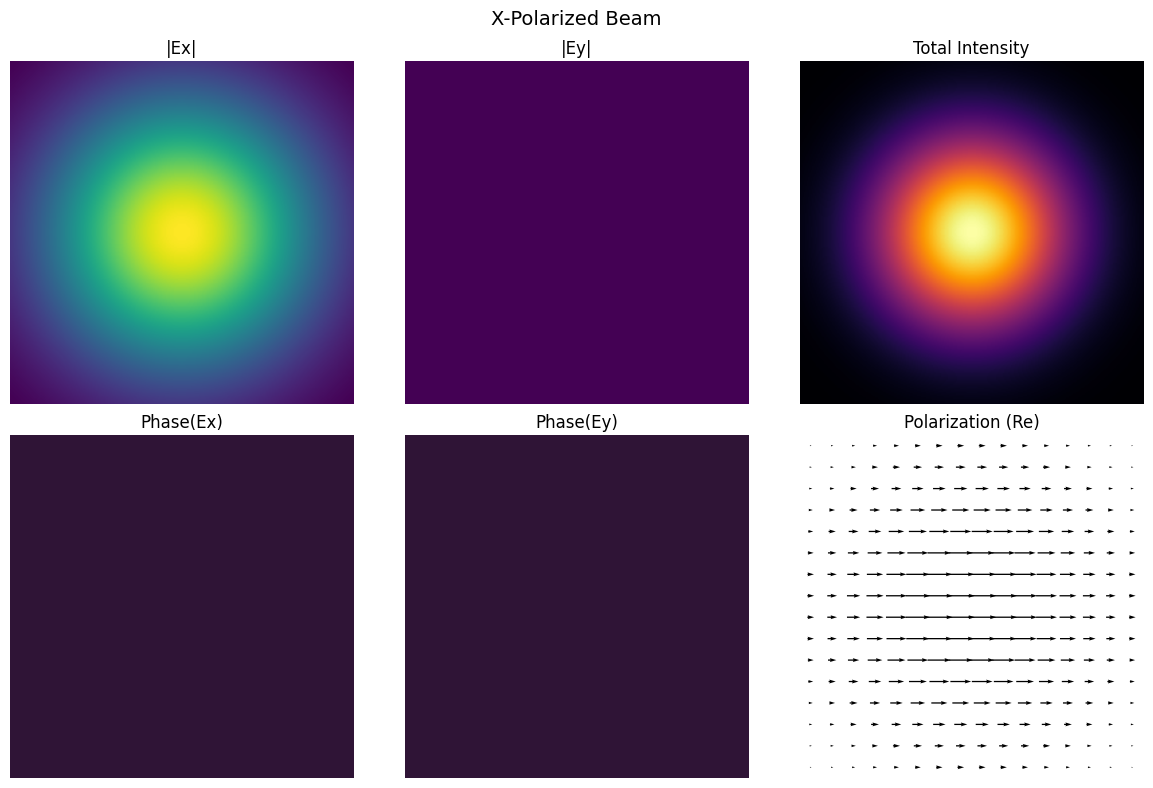

In [6]:
x_pol = jns.models.x_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    beam_radius=beam_radius,
)
plot_polarized_beam(x_pol, "X-Polarized Beam")

## Y-Polarized Beam

Uniform linear polarization along the y-axis.

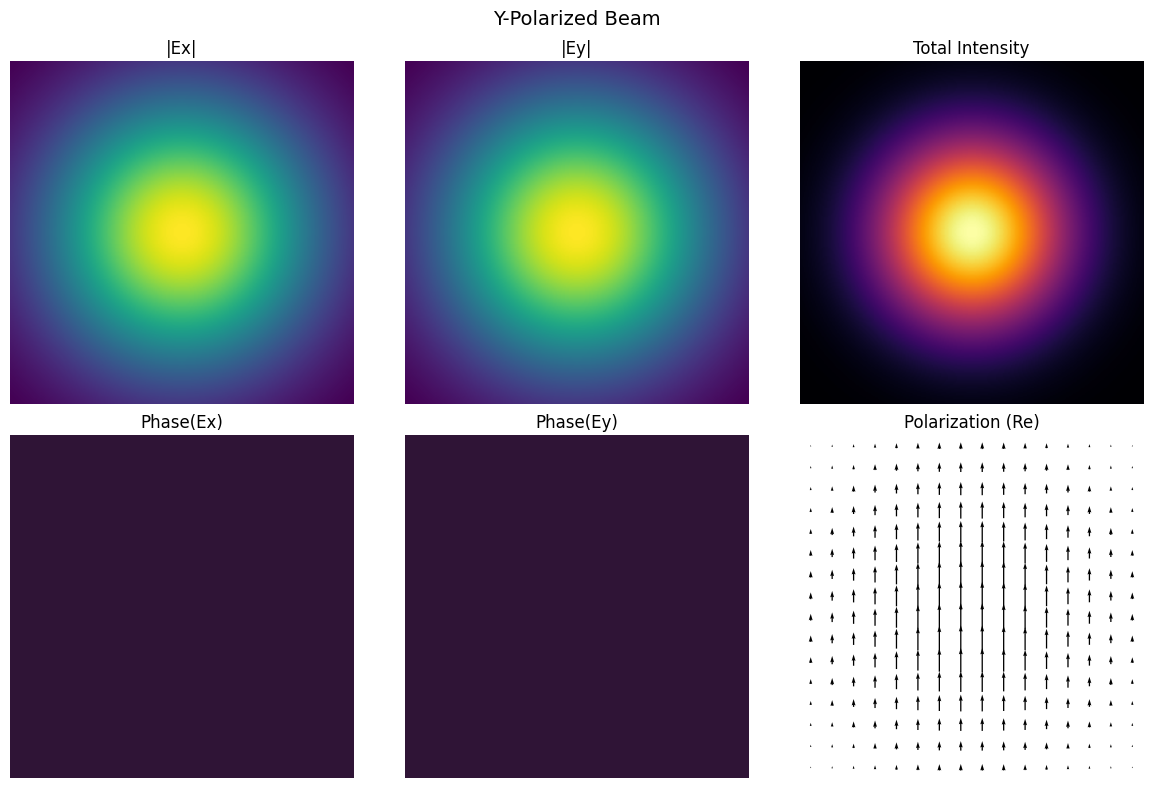

In [7]:
y_pol = jns.models.y_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    beam_radius=beam_radius,
)
plot_polarized_beam(y_pol, "Y-Polarized Beam")

## 45° Linear Polarization

Linear polarization at 45° to the x-axis.

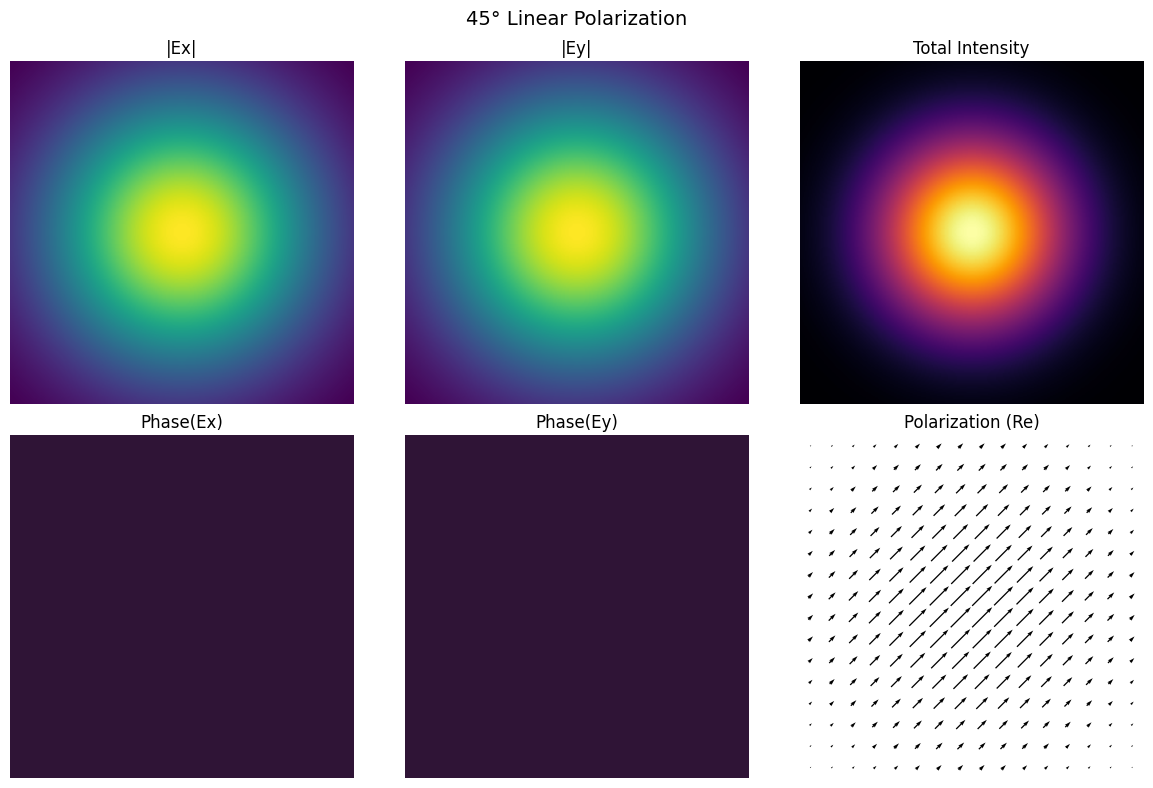

In [8]:
linear_45 = jns.models.linear_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    polarization_angle=jnp.pi / 4,
    beam_radius=beam_radius,
)
plot_polarized_beam(linear_45, "45° Linear Polarization")

## Right Circular Polarization

The electric field rotates clockwise when viewed from the receiver.

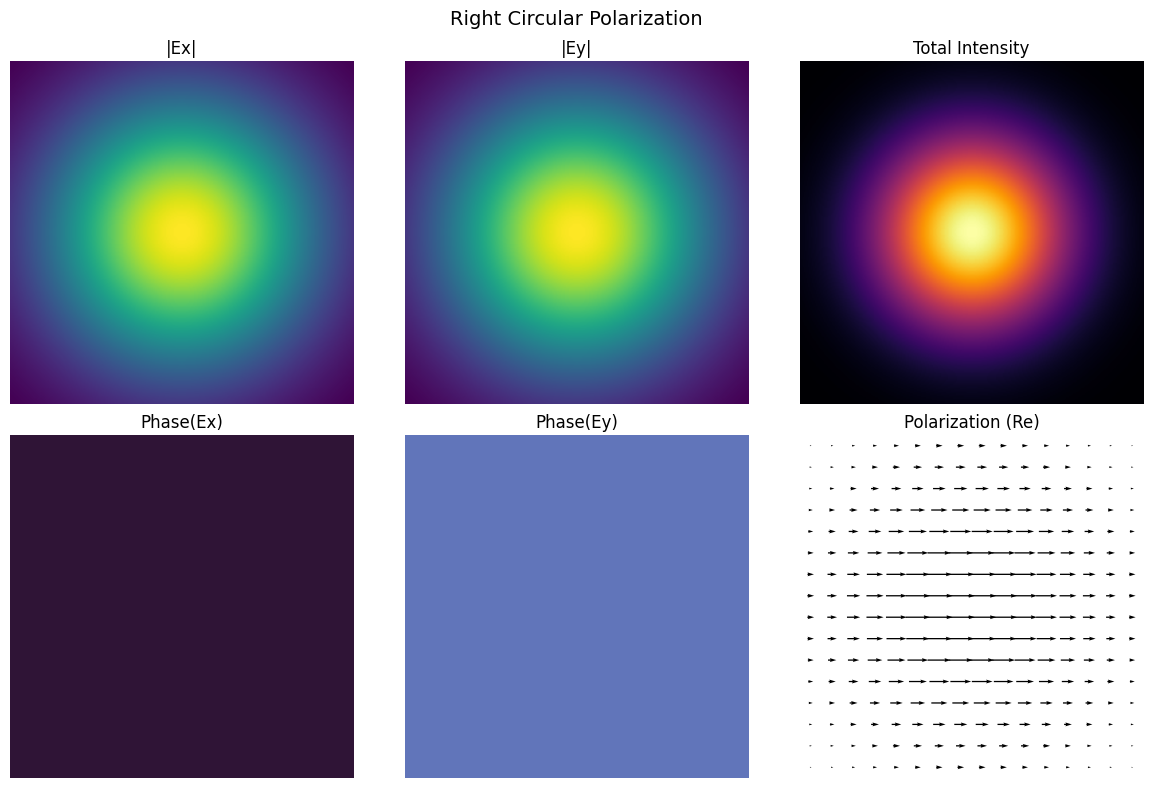

In [9]:
rcp = jns.models.circular_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    handedness="right",
    beam_radius=beam_radius,
)
plot_polarized_beam(rcp, "Right Circular Polarization")

## Left Circular Polarization

The electric field rotates counter-clockwise when viewed from the receiver.

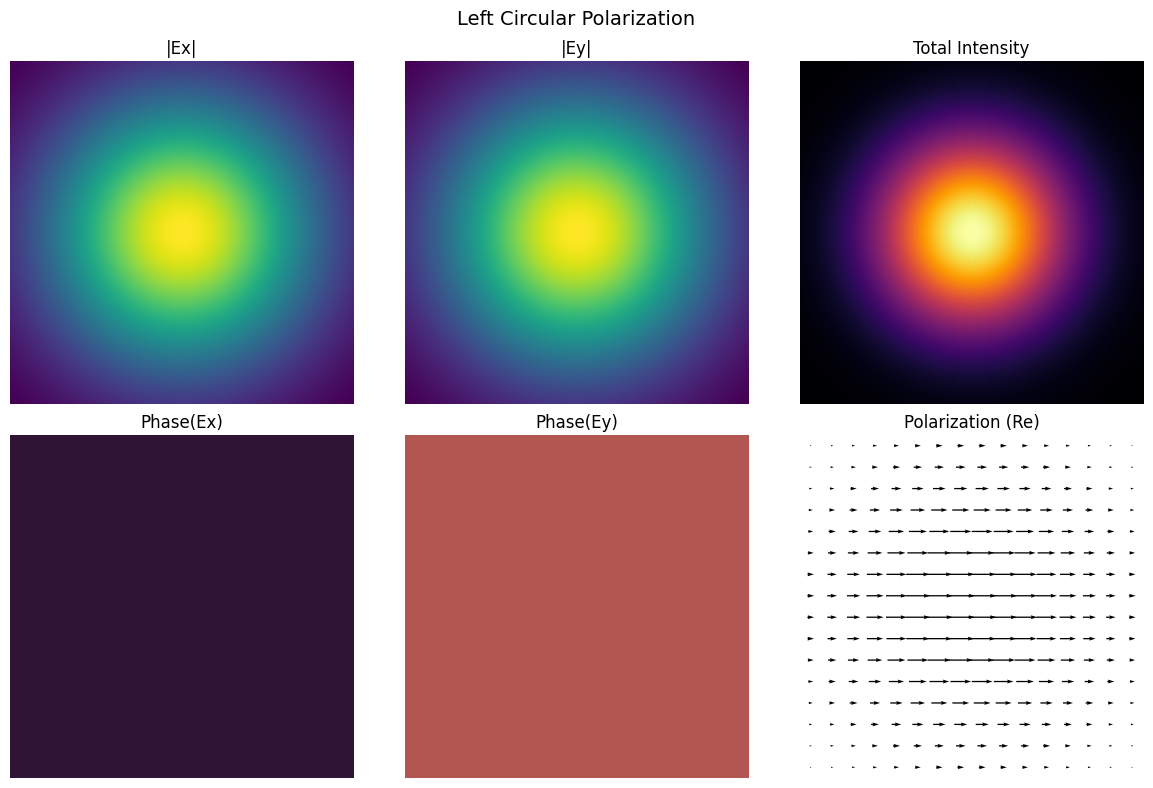

In [10]:
lcp = jns.models.circular_polarized_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    handedness="left",
    beam_radius=beam_radius,
)
plot_polarized_beam(lcp, "Left Circular Polarization")

## Generalized Cylindrical Vector Beam (Order 2)

Higher-order cylindrical vector beams have multiple polarization singularities.

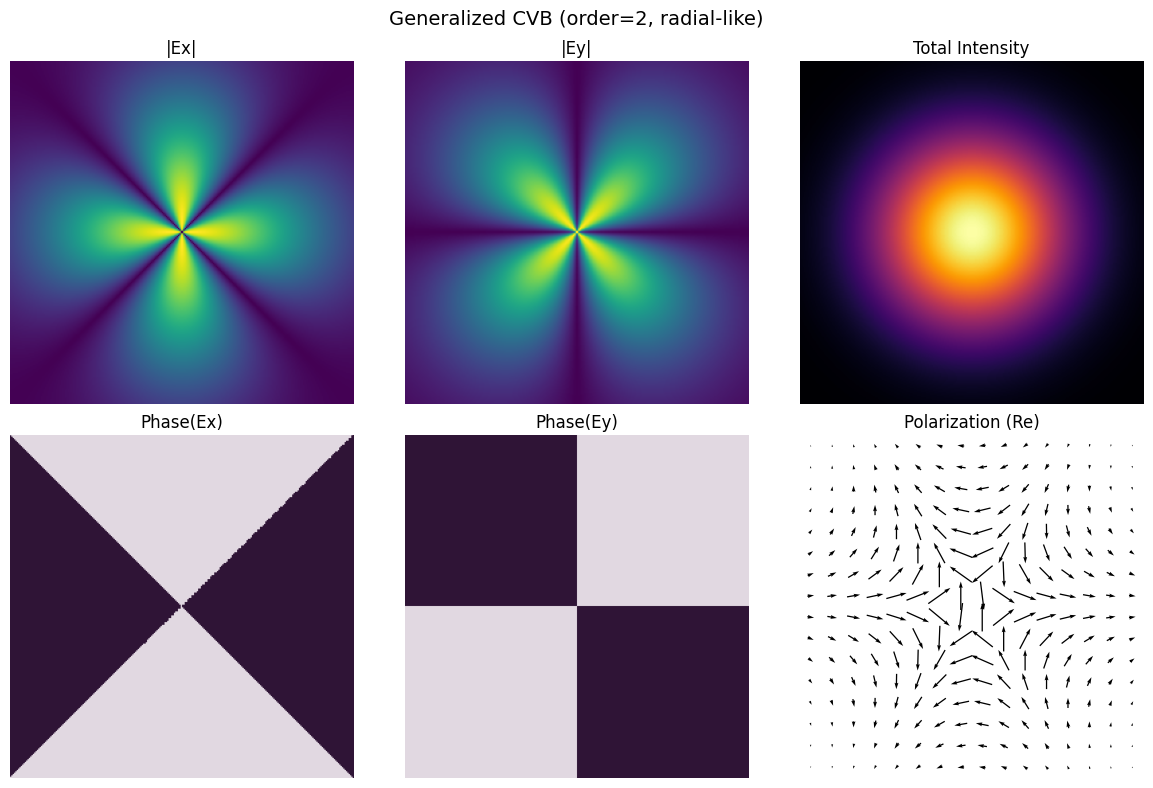

In [11]:
cvb_order2 = jns.models.generalized_cylindrical_vector_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    order=2,
    phase_offset=0.0,
    beam_radius=beam_radius,
)
plot_polarized_beam(cvb_order2, "Generalized CVB (order=2, radial-like)")

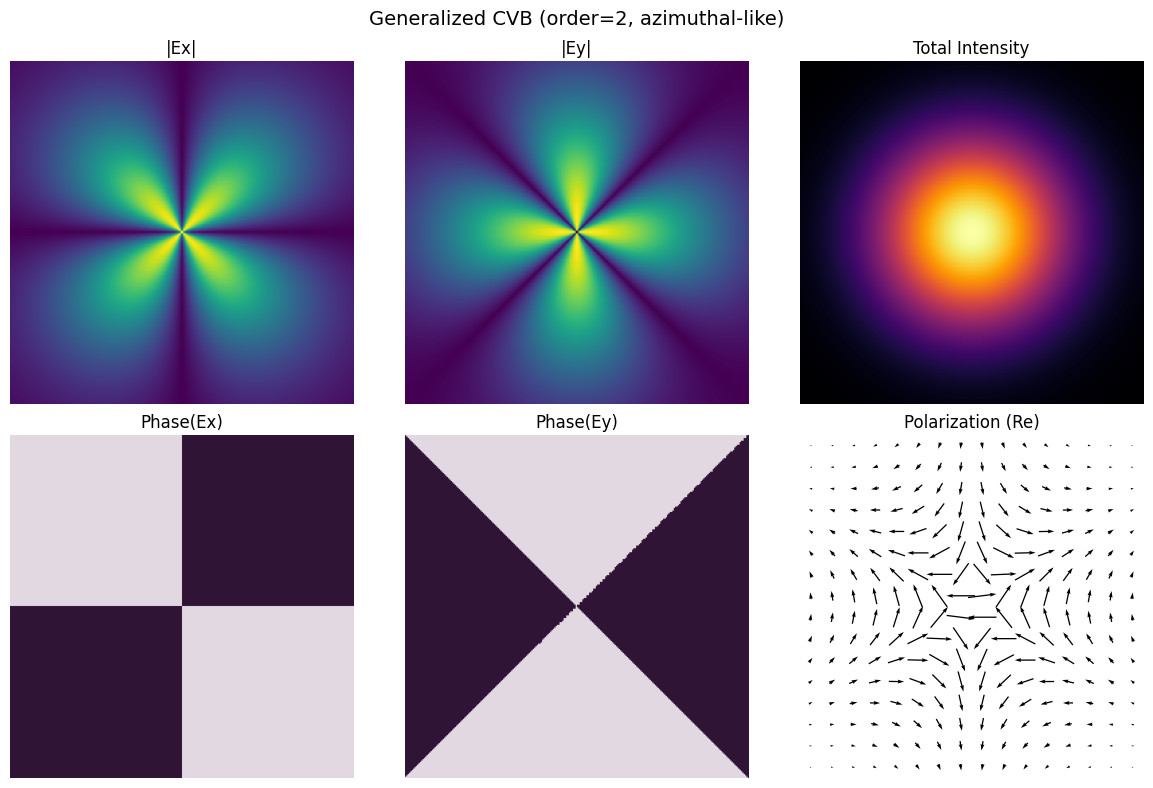

In [12]:
cvb_order2_azim = jns.models.generalized_cylindrical_vector_beam(
    wavelength=wavelength,
    dx=dx,
    grid_size=grid_size,
    order=2,
    phase_offset=jnp.pi / 2,
    beam_radius=beam_radius,
)
plot_polarized_beam(cvb_order2_azim, "Generalized CVB (order=2, azimuthal-like)")